####**1) Importing Data and required Packages**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


####**2) Data Checks to perform**



*   shape of the dataset.
*   datatype of all the features.
*   missing values in dataset.
*   duplicate values in the dataset.
*   number of unique values in each features.
*   check statistics of dataset.




In [6]:
#shape of the dataset
df.shape

(569, 33)

In [7]:
#check the datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#Check the missing value

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#Check duplicates
df.duplicated().sum()

0

**Insights**

*   dataset consists 33 columns out of which only `diagnosis` is catecorical type, all other are numerical datatype.
*   column name `Unnamed: 32` contains all the Nan values.
*   No duplicates values in the dataset. 



In [12]:
#Check the number of unique values in each column

df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [13]:
#Droping the id and Unnamed: 32 columns 

df = df.drop(columns=['id','Unnamed: 32'])
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
#Checking the statistics of dataset

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Insight**

*  standard deviation are too high for some features.
*  for some features differance between min and max values are high.
*  outliers present in the dataset.

####**3) Exploring Data**

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
#define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype !=  'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

#print
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 30 numerical features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

We have 1 categorical features: ['diagnosis']


####**4) Visualization**

<Axes: title={'center': 'Correlation with diagnosis_M'}>

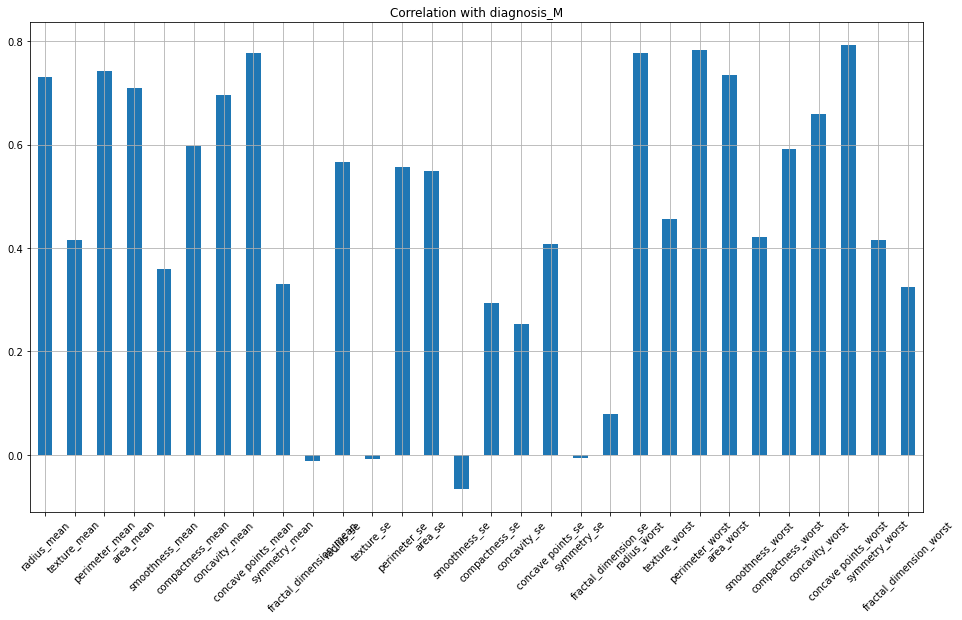

In [21]:
df_2 = df.drop('diagnosis', axis=1)

df_2.corrwith(
    df['diagnosis'] =='M').plot.bar(figsize=(16,9),
                              title = 'Correlation with diagnosis_M',
                              rot=45, grid=True)


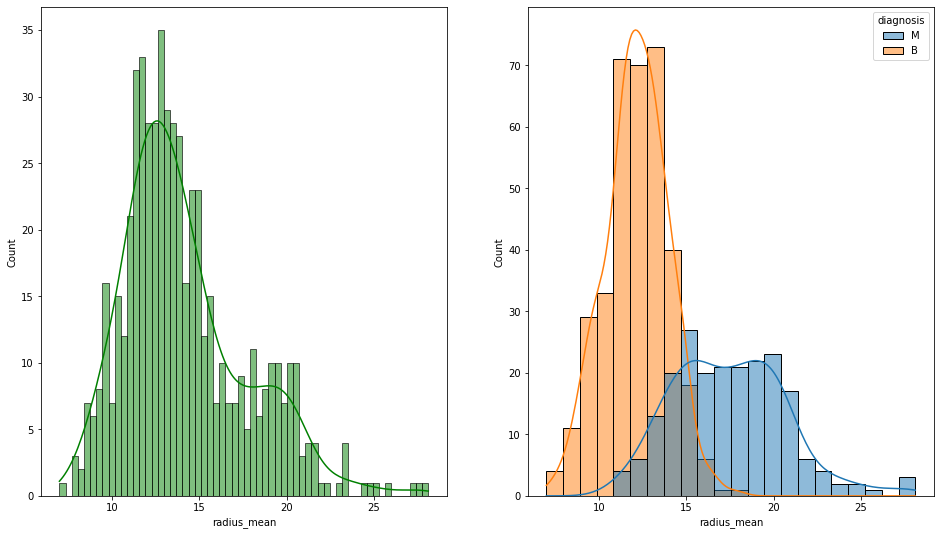

In [23]:
#Histrogram and KDE
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='radius_mean', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='radius_mean', kde=True, hue='diagnosis')
plt.show()

**Insight**

*  Benign have low `radius_mean` , the mean value is aprox 12-13.
*  Malignant have high `radius_mean`, the mean value is aprox 18. 

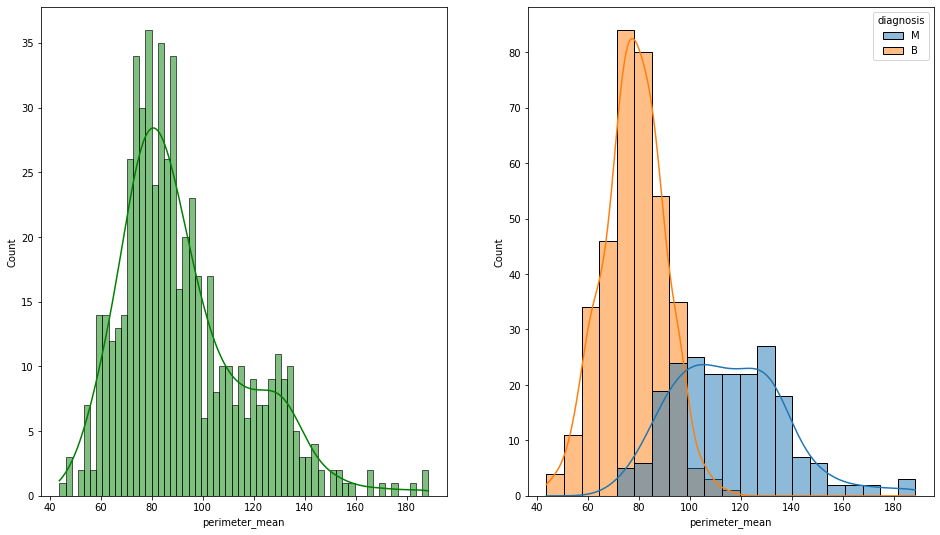

In [24]:
# with perimeter_mean
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='perimeter_mean', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='perimeter_mean', kde=True, hue='diagnosis')
plt.show()

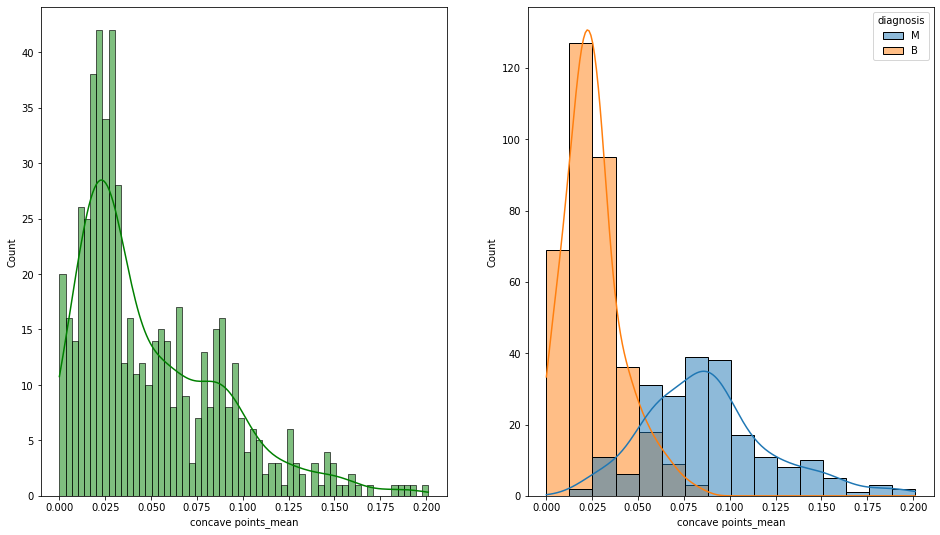

In [26]:
#with concave points_mean
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='concave points_mean', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='concave points_mean', kde=True, hue='diagnosis')
plt.show()

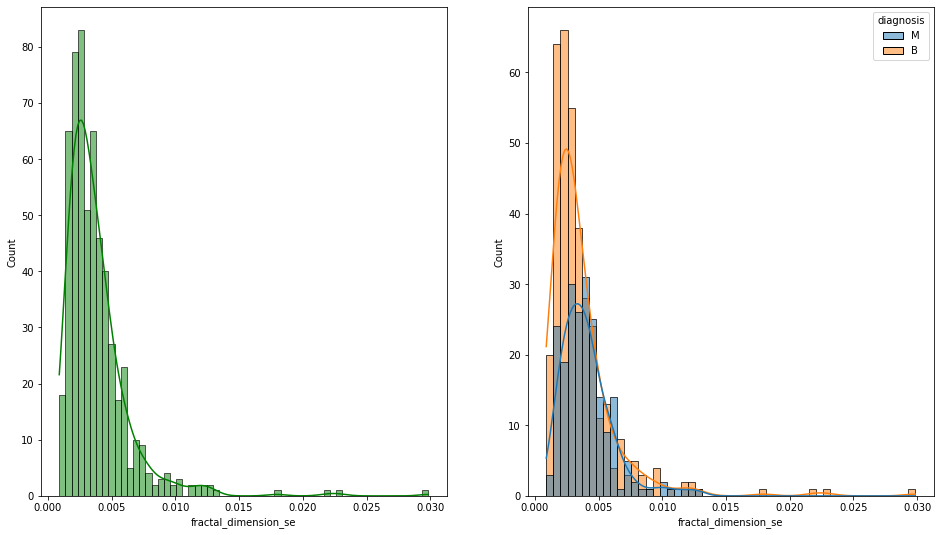

In [27]:
#with fractal_dimension_se
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='fractal_dimension_se', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='fractal_dimension_se', kde=True, hue='diagnosis')
plt.show()

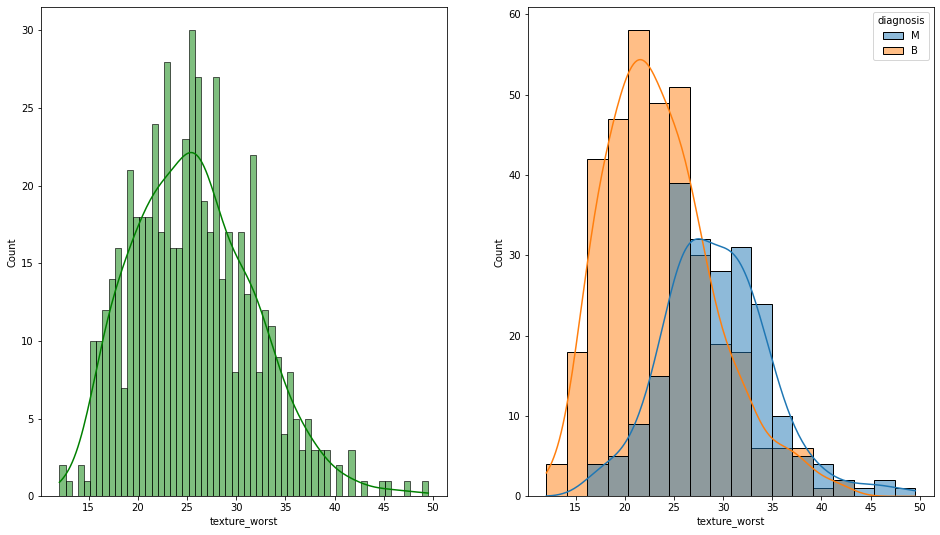

In [28]:
#with texture_worst
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='texture_worst', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='texture_worst', kde=True, hue='diagnosis')
plt.show()

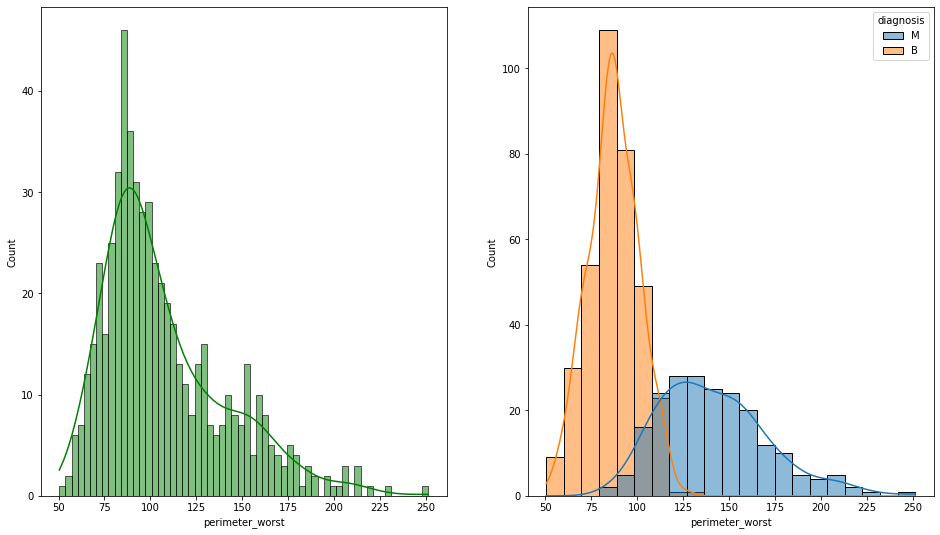

In [29]:
#with perimeter_worst
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='perimeter_worst', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='perimeter_worst', kde=True, hue='diagnosis')
plt.show()

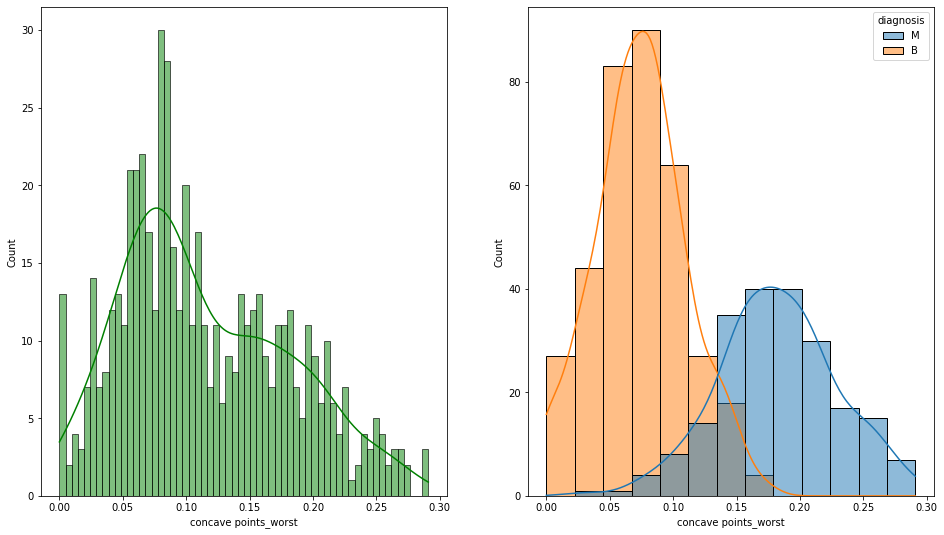

In [30]:
#with concave points_worst
fig, axs= plt.subplots(1,2, figsize=(16,9))
plt.subplot(121)
sns.histplot(data=df, x='concave points_worst', bins=60, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='concave points_worst', kde=True, hue='diagnosis')
plt.show()

####**Univariate Analysis**

**How diagnosis is distributed?**

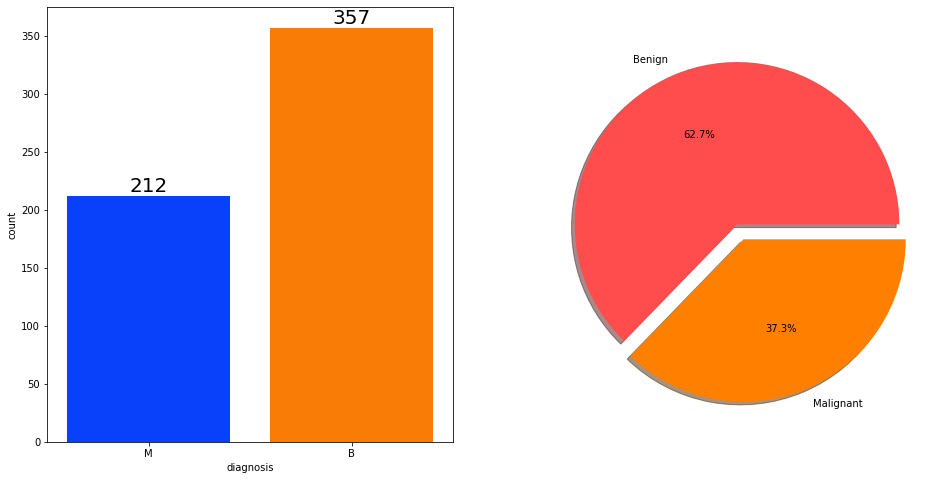

In [36]:
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot(x=df['diagnosis'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['diagnosis'].value_counts(),labels=['Benign','Malignant'],explode=[0,0.1],autopct='%1.1f%%',shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

####**Multivariate Analysis**

In [ ]:
sns.pairplot(df, hue='diagnosis')
plt.show()